# Principal Components Analysis with Wine Data

In [1]:
#Imports
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sb
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.datasets import load_digits

plt.style.use('fivethirtyeight')

/Users/darrenklee/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#Load in the wine data
wine = pd.read_csv("../data/winequality_merged.csv")
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_wine
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [3]:
wine.shape

(6497, 13)

In [5]:
wine.red_wine.value_counts(normalize=True)
# ~25% of the responses are red wine.

0    0.753886
1    0.246114
Name: red_wine, dtype: float64

Which attributes here can we use to identify which class of wine it belongs to?

In [6]:
#Assign red_wine column to variable rw 
rw = wine.red_wine

#Drop red_wine from wine

wine.drop("red_wine", axis = 1, inplace= True)

First let's determine the correlations between the independent variables

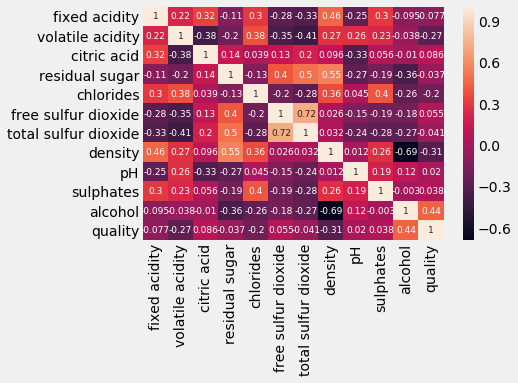

In [16]:
#Correlation heatmap

sb.heatmap(wine.corr(), annot=True, annot_kws={"size": 9})

Multiculineartiy exists when columns highly correlated with one another. One benefit of PCA is that it can deal with multicollinearity pretty well because multicollinearity simply means that you have excess dimensions in your data.

In [17]:
#We need to standardize or scale the data before we can transform our data because the measurements vary 
# among the variables.

#Intialize scaler, you can use minmaxscaler as well.. both the same.
scale = StandardScaler()

#Fit and transform wine data using standard scaler
wine_s = scale.fit_transform(wine)

#let's take a look at the first row of data by the first slice:
wine_s[0]

array([ 0.14247327,  2.18883292, -2.19283252, -0.7447781 ,  0.56995782,
       -1.10013986, -1.44635852,  1.03499282,  1.81308951,  0.19309677,
       -0.91546416, -0.93722961])

In [18]:
#Intialize PCA object
#We're deliberating leaving the n_components parameters alone
pca = PCA()

#Fit and transform wine_s use pca
wine_pca = pca.fit_transform(wine_s)

#Number of components
pca.n_components_

12

In [20]:
pca.n_features_

12

In [19]:
pca.explained_variance_

array([ 3.04201535,  2.65026192,  1.64175951,  1.06878976,  0.84062985,
        0.66050084,  0.56391324,  0.51606227,  0.45844285,  0.29905893,
        0.22762255,  0.03279021])

We need to reduce the number of dimensions from 12, but how do we select how many to keep? Let's visualize how much
variance is explained for each principal component. They will be ranked by the greatest explained variance first. A cumulative variance of 85% can be a great rule of thumb for our threshold in selecting number of components. 


In [21]:
#Shows the percentage of the variance explained by each component
pca.explained_variance_ratio_

array([ 0.25346226,  0.22082117,  0.13679223,  0.0890521 ,  0.07004171,
        0.05503326,  0.04698554,  0.04299857,  0.03819769,  0.02491774,
        0.01896563,  0.0027321 ])

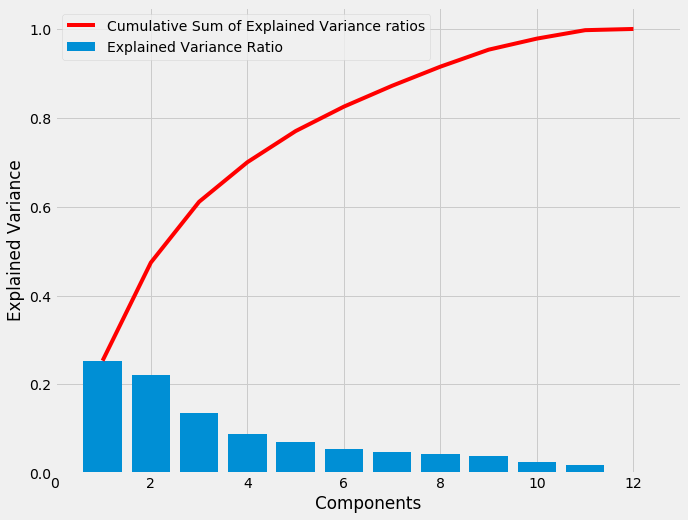

In [23]:
plt.figure(figsize=(10, 8))

components = range(1, pca.n_components_ +1)

plt.bar(components, pca.explained_variance_ratio_, label = "Explained Variance Ratio")
plt.plot(components, np.cumsum(pca.explained_variance_ratio_), 
         c = "r", label = "Cumulative Sum of Explained Variance ratios")

plt.xlabel("Components")
plt.ylabel("Explained Variance")
plt.legend();

At the 85% explained variance level, we are at about 7 coponents. At just 2 components, you can get about 50% of the explained variance (essense of the original dataset). This tell us that if we view this 12-dimension data on a 2D scatter plot then we would be seeing about half of the total variance in the dataset.

In [48]:
pca.components_[1].mean()

0.092576717827446087

In [28]:
pca.explained_variance_.sum()

12.001847290640395

In [56]:
pca.explained_variance_ratio_[:3].sum()

0.61107566218386822

How do you label the components based on the weights?

Let's print out the component weights with their corresponding variables for PC1, PC2, and PC3

In [31]:
#PC1
for col, comp in zip(wine.columns, pca.components_[0]):
    print col, comp

    #Total sulfur dioxide has the strongest weight

fixed acidity -0.256928733111
volatile acidity -0.39493117944
citric acid 0.146460610663
residual sugar 0.318905191475
chlorides -0.313449939668
free sulfur dioxide 0.422691371567
total sulfur dioxide 0.474419684357
density -0.0924375324327
pH -0.20806956646
sulphates -0.29985191609
alcohol -0.0589240827477
quality 0.0874757097877


In [32]:
#PC2
for col, comp in zip(wine.columns, pca.components_[1]):
    print col, comp
    
    #density 

fixed acidity 0.261843062046
volatile acidity 0.105198251341
citric acid 0.144093484947
residual sugar 0.342584967641
chlorides 0.269770095513
free sulfur dioxide 0.111178780564
total sulfur dioxide 0.143947528574
density 0.554920473971
pH -0.152921853598
sulphates 0.1196342033
alcohol -0.49272747405
quality -0.29660090632


In [33]:
#Component 3
for col, comp in zip(wine.columns, pca.components_[2]):
    print col, comp

fixed acidity 0.467486190591
volatile acidity -0.279689315676
citric acid 0.588075565852
residual sugar -0.0755017007908
chlorides 0.0467692077858
free sulfur dioxide -0.0989980148665
total sulfur dioxide -0.101281425438
density -0.0515633823809
pH -0.406787409328
sulphates 0.168691280174
alcohol 0.212931416399
quality 0.295837730114


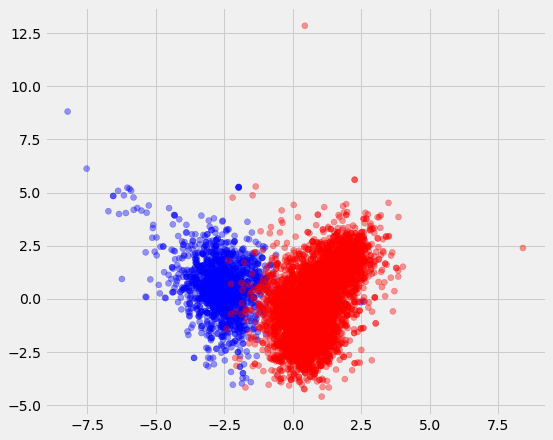

In [44]:
#Create color values from rw
colors = rw.map({0:"r", 1:"b"})

plt.figure(figsize=(8,7))
plt.scatter(wine_pca[:, 0], wine_pca[:, 1], c=colors, alpha=.4);

48% of the cumulative variance of this dataset is plotted. We can make a pretty decent model by putting a line down the middle here.

Here's the same graph in 3d: 

https://plot.ly/~DarrenK.Lee/1/

# Logistic Regression Model Selection

In [82]:
X = wine_pca[:,:2]
y = rw
# We previously saved the variable rw as the target column, now we will try to build a model to predict if 
# the wine is a red bottle or not. 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25)

In [68]:
y.value_counts(normalize= True)

# remember that our null accuracy score to beat is 75%. We can assume that the entire dataset is not red wine,
# and we would be about 75% accurate about that statement. Let's beat this baseline number!

0    0.753886
1    0.246114
Name: red_wine, dtype: float64

In [65]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

lr.score(X_train, y_train)

0.98275862068965514

In [66]:
lr.score(X_test, y_test)

0.98584615384615382

In [69]:
preds = lr.predict(X_test)

In [73]:
cm = confusion_matrix(y_test, preds)
c_matrix = pd.DataFrame(cm, columns= ("Predicted Not Red Wine", "Predicted Red Wine"))
c_matrix

,Predicted Not Red Wine,Predicted Red Wine
0,1205,9
1,14,397


The trained model was applied to new/unseen data in the test set. We see a 95.6% accuracy with the test set in classification. Not bad for a model without a specific boost or optimized parameter tuning! Below, you can see the cross validated scores if we were to include all of the components into play. This is a matter of the context of your data. Falsely classifying may be more serious when you're dealing with Credit Card fraud over classifying wine types.

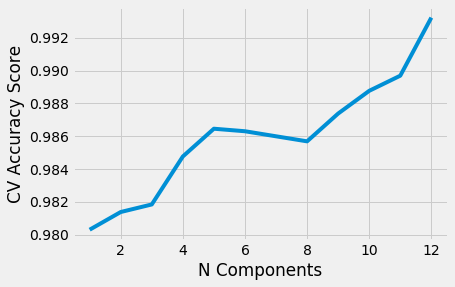

In [67]:
components = range(1, 13)
scores = []

for i in components:
    pca = PCA(n_components=i)
    pca_data = pca.fit_transform(wine_s)
    score = cross_val_score(LogisticRegression(), pca_data, rw, cv = 5, scoring = "accuracy").mean()
    scores.append(score)
    
plt.plot(components, scores)
plt.xlabel("N Components")
plt.ylabel("CV Accuracy Score"); 